In [3]:
import requests as rq
from bs4 import BeautifulSoup as bl
import numpy as np
print("导入成功")

导入成功


In [4]:
#访问豆瓣网站
url='https://book.douban.com/latest'
r=rq.get(url)
print(r)#陈宫访问了网站，返回值为Response [200]
print(r.encoding)
print(r.url)

<Response [200]>
utf-8
https://book.douban.com/latest


In [11]:
print(r.text)



<!DOCTYPE html>
<html lang="zh-cmn-Hans" class=" book-new-nav">
<head>
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
  <title>新书速递</title>
  
<script>!function(e){var o=function(o,n,t){var c,i,r=new Date;n=n||30,t=t||"/",r.setTime(r.getTime()+24*n*60*60*1e3),c="; expires="+r.toGMTString();for(i in o)e.cookie=i+"="+o[i]+c+"; path="+t},n=function(o){var n,t,c,i=o+"=",r=e.cookie.split(";");for(t=0,c=r.length;t<c;t++)if(n=r[t].replace(/^\s+|\s+$/g,""),0==n.indexOf(i))return n.substring(i.length,n.length).replace(/\"/g,"");return null},t=e.write,c={"douban.com":1,"douban.fm":1,"google.com":1,"google.cn":1,"googleapis.com":1,"gmaptiles.co.kr":1,"gstatic.com":1,"gstatic.cn":1,"google-analytics.com":1,"googleadservices.com":1},i=function(e,o){var n=new Image;n.onload=function(){},n.src="https://www.douban.com/j/except_report?kind=ra022&reason="+encodeURIComponent(e)+"&environment="+encodeURIComponent(o)},r=function(o){try{t.call(e,o)}catch(e){t(o)}},a=/<script.*?src\=

In [16]:
soup=bl(r.text,'lxml')
print(soup)

<!DOCTYPE html>
<html class="book-new-nav" lang="zh-cmn-Hans">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>新书速递</title>
<script>!function(e){var o=function(o,n,t){var c,i,r=new Date;n=n||30,t=t||"/",r.setTime(r.getTime()+24*n*60*60*1e3),c="; expires="+r.toGMTString();for(i in o)e.cookie=i+"="+o[i]+c+"; path="+t},n=function(o){var n,t,c,i=o+"=",r=e.cookie.split(";");for(t=0,c=r.length;t<c;t++)if(n=r[t].replace(/^\s+|\s+$/g,""),0==n.indexOf(i))return n.substring(i.length,n.length).replace(/\"/g,"");return null},t=e.write,c={"douban.com":1,"douban.fm":1,"google.com":1,"google.cn":1,"googleapis.com":1,"gmaptiles.co.kr":1,"gstatic.com":1,"gstatic.cn":1,"google-analytics.com":1,"googleadservices.com":1},i=function(e,o){var n=new Image;n.onload=function(){},n.src="https://www.douban.com/j/except_report?kind=ra022&reason="+encodeURIComponent(e)+"&environment="+encodeURIComponent(o)},r=function(o){try{t.call(e,o)}catch(e){t(o)}},a=/<script.*?src\=["']?([^"

In [17]:
print(soup.a)#完整的标签

<a class="nav-login" href="https://accounts.douban.com/passport/login?source=book" rel="nofollow">登录/注册</a>


In [5]:
print(soup.a.attrs['href'])#输出属性

NameError: name 'soup' is not defined

In [20]:
print(soup.a.text)输出标签元素

登录/注册


下面学习使用简单的爬虫来进行网络数据下载

In [21]:
infors=soup.find_all('div',class_='detail-frame')
print(infors)

[<div class="detail-frame">
<h2>
<a href="https://book.douban.com/subject/34434309/">82年生的金智英</a>
</h2>
<p class="rating">
<span class="allstar40"></span>
<span class="font-small color-lightgray">
                                8.0
                        </span>
</p>
<p class="color-gray">
                        [韩]赵南柱 / 贵州人民出版社 / 2019-9
                    </p>
<p class="detail">
                        一个女孩要经历多少看不见的坎坷，才能跌跌撞撞地长大成人。
                    </p>
</div>, <div class="detail-frame">
<h2>
<a href="https://book.douban.com/subject/34808043/">离婚</a>
</h2>
<p class="rating">
<span class="allstar45"></span>
<span class="font-small color-lightgray">
                                9.1
                        </span>
</p>
<p class="color-gray">
                        老舍 / 云南人民出版社 / 2019-9
                    </p>
<p class="detail">
                        老舍名作。围绕北京财政所的几名科员及家眷展开。描述民国时期小官僚的日常，温和地讽刺了他们对生活的敷衍。
                    </p>
</div>, <div class="detail-frame">
<h2>
<a href="h

In [27]:
lst=[]
for infor in infors:
    dic={}
    dic['书名']=infor.h2.text.replace('\n','').replace(' ','')
    dic['评分']=infor.find_all('p')[0].text.replace('\n','').replace(' ','')
    dic['其他信息']=infor.find_all('p')[1].text.replace('\n','').replace(' ','')
    dic['简介']=infor.find_all('p')[2].text.replace('\n','').replace(' ','')
    lst.append(dic)
for i in lst:
    for k in i:
        print(i[k])

82年生的金智英
8.0
[韩]赵南柱/贵州人民出版社/2019-9
一个女孩要经历多少看不见的坎坷，才能跌跌撞撞地长大成人。
离婚
9.1
老舍/云南人民出版社/2019-9
老舍名作。围绕北京财政所的几名科员及家眷展开。描述民国时期小官僚的日常，温和地讽刺了他们对生活的敷衍。
庸人自扰
8.3
[美]理查德·耶茨/上海译文出版社/2019-9
现实的重锤击碎天真的梦想，志大才疏的梦想家的无尽坠落。二十世纪伟大的美国小说家耶茨作品。
尸人庄谜案
7.9
[日]今村昌弘/北京联合出版公司/2019-9
社团活动室内，有人发现一张纸条，上面写着“今年谁来当祭品?”
绿山墙的安妮：图像小说
9.6
[加]露西•莫德•蒙哥马利原著/[美]玛利亚•马斯登改编/[美]布伦娜•桑姆勒绘/浦睿文化·湖南文艺出版社/2019-8
浓缩了原著的精髓，以美不胜收的全彩插图，再现了迷人的绿山墙里不一样的女孩安妮。
爱的救赎
9.3
[法]让-皮埃尔·吉布拉/后浪丨湖南美术出版社/2019-9
讲述二战期间为爱而生、为自由而不惜生命的巴黎人的坚持、放任，爱与恨。
黑暗中飘香的谎言
9.3
[日]下村敦史/湖南文艺出版社/2019-9
四十年未曾谋面的哥哥、刻意隐瞒真相的母亲、关系疏离的亲生女儿、藏在家中的陌生人……江户川乱步奖获奖作品。
哀伤纪
8.0
钟晓阳/北京十月文艺出版社/2019-9
一九八六年一位少女孤身到美国旧金山读书，认识一对打鱼伙伴，三人成为好友。二〇一四年，迈入中年的他们命运再次交错，书写一出“哀伤书”。
战争

[德]路德维希·雷恩/低音•北京联合出版公司/2019-10
作品以第一人称讲述了主人公路德维希•雷恩——一名五等兵，跟随大部队进军比利时和法国的经历。“一战”后最成功的反战纪实文学之一。
不似骄阳
9.4
[英]安东尼·伯吉斯/理想国丨广西师范大学出版社/2019-8
虚构莎士比亚的爱情生活，书名取自莎士比亚十四行诗第130首：“我爱人的双眸绝不似骄阳。”入选《西方正典》书目。
沉睡者
9.0
[墨]罗多尔弗·桑图约著/[阿根廷]卡洛斯·亚翁绘/世界图书出版有限公司北京分公司/2019-8
从冷冻中醒来时，出现在他面前的并不是木卫一的美好生活，而是阴暗的地下室和躺在地上的一具死尸……
奥斯维辛的拳击手

[德]莱因哈特·克莱斯特/后浪丨浙江教育出版社/201

In [28]:
import pandas as pd
df=pd.DataFrame(lst)
df

,书名,评分,其他信息,简介
0,82年生的金智英,8.0,[韩]赵南柱/贵州人民出版社/2019-9,一个女孩要经历多少看不见的坎坷，才能跌跌撞撞地长大成人。
1,离婚,9.1,老舍/云南人民出版社/2019-9,老舍名作。围绕北京财政所的几名科员及家眷展开。描述民国时期小官僚的日常，温和地讽刺了他们对生...
2,庸人自扰,8.3,[美]理查德·耶茨/上海译文出版社/2019-9,现实的重锤击碎天真的梦想，志大才疏的梦想家的无尽坠落。二十世纪伟大的美国小说家耶茨作品。
3,尸人庄谜案,7.9,[日]今村昌弘/北京联合出版公司/2019-9,社团活动室内，有人发现一张纸条，上面写着“今年谁来当祭品?”
4,绿山墙的安妮：图像小说,9.6,[加]露西•莫德•蒙哥马利原著/[美]玛利亚•马斯登改编/[美]布伦娜•桑姆勒绘/浦睿文化·...,浓缩了原著的精髓，以美不胜收的全彩插图，再现了迷人的绿山墙里不一样的女孩安妮。
5,爱的救赎,9.3,[法]让-皮埃尔·吉布拉/后浪丨湖南美术出版社/2019-9,讲述二战期间为爱而生、为自由而不惜生命的巴黎人的坚持、放任，爱与恨。
6,黑暗中飘香的谎言,9.3,[日]下村敦史/湖南文艺出版社/2019-9,四十年未曾谋面的哥哥、刻意隐瞒真相的母亲、关系疏离的亲生女儿、藏在家中的陌生人……江户川乱步...
7,哀伤纪,8.0,钟晓阳/北京十月文艺出版社/2019-9,一九八六年一位少女孤身到美国旧金山读书，认识一对打鱼伙伴，三人成为好友。二〇一四年，迈入中年...
8,战争,,[德]路德维希·雷恩/低音•北京联合出版公司/2019-10,作品以第一人称讲述了主人公路德维希•雷恩——一名五等兵，跟随大部队进军比利时和法国的经历。“...
9,不似骄阳,9.4,[英]安东尼·伯吉斯/理想国丨广西师范大学出版社/2019-8,虚构莎士比亚的爱情生活，书名取自莎士比亚十四行诗第130首：“我爱人的双眸绝不似骄阳。”入选...


In [31]:
    df['出版社']=df['其他信息'].str.split('/').str[1]
    df['年份']=df['其他信息'].str.split('/').str[2]
    df

,书名,评分,其他信息,简介,出版社,年份
0,82年生的金智英,8.0,[韩]赵南柱/贵州人民出版社/2019-9,一个女孩要经历多少看不见的坎坷，才能跌跌撞撞地长大成人。,贵州人民出版社,2019-9
1,离婚,9.1,老舍/云南人民出版社/2019-9,老舍名作。围绕北京财政所的几名科员及家眷展开。描述民国时期小官僚的日常，温和地讽刺了他们对生...,云南人民出版社,2019-9
2,庸人自扰,8.3,[美]理查德·耶茨/上海译文出版社/2019-9,现实的重锤击碎天真的梦想，志大才疏的梦想家的无尽坠落。二十世纪伟大的美国小说家耶茨作品。,上海译文出版社,2019-9
3,尸人庄谜案,7.9,[日]今村昌弘/北京联合出版公司/2019-9,社团活动室内，有人发现一张纸条，上面写着“今年谁来当祭品?”,北京联合出版公司,2019-9
4,绿山墙的安妮：图像小说,9.6,[加]露西•莫德•蒙哥马利原著/[美]玛利亚•马斯登改编/[美]布伦娜•桑姆勒绘/浦睿文化·...,浓缩了原著的精髓，以美不胜收的全彩插图，再现了迷人的绿山墙里不一样的女孩安妮。,[美]玛利亚•马斯登改编,[美]布伦娜•桑姆勒绘
5,爱的救赎,9.3,[法]让-皮埃尔·吉布拉/后浪丨湖南美术出版社/2019-9,讲述二战期间为爱而生、为自由而不惜生命的巴黎人的坚持、放任，爱与恨。,后浪丨湖南美术出版社,2019-9
6,黑暗中飘香的谎言,9.3,[日]下村敦史/湖南文艺出版社/2019-9,四十年未曾谋面的哥哥、刻意隐瞒真相的母亲、关系疏离的亲生女儿、藏在家中的陌生人……江户川乱步...,湖南文艺出版社,2019-9
7,哀伤纪,8.0,钟晓阳/北京十月文艺出版社/2019-9,一九八六年一位少女孤身到美国旧金山读书，认识一对打鱼伙伴，三人成为好友。二〇一四年，迈入中年...,北京十月文艺出版社,2019-9
8,战争,,[德]路德维希·雷恩/低音•北京联合出版公司/2019-10,作品以第一人称讲述了主人公路德维希•雷恩——一名五等兵，跟随大部队进军比利时和法国的经历。“...,低音•北京联合出版公司,2019-10
9,不似骄阳,9.4,[英]安东尼·伯吉斯/理想国丨广西师范大学出版社/2019-8,虚构莎士比亚的爱情生活，书名取自莎士比亚十四行诗第130首：“我爱人的双眸绝不似骄阳。”入选...,理想国丨广西师范大学出版社,2019-8


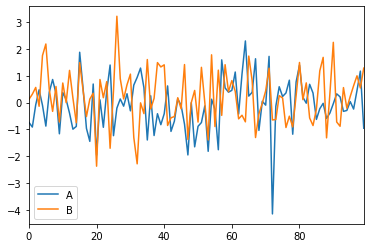

In [41]:
import matplotlib
df2=pd.DataFrame(np.random.randn(100,2),columns=['A','B'])
df2
df2.plot()

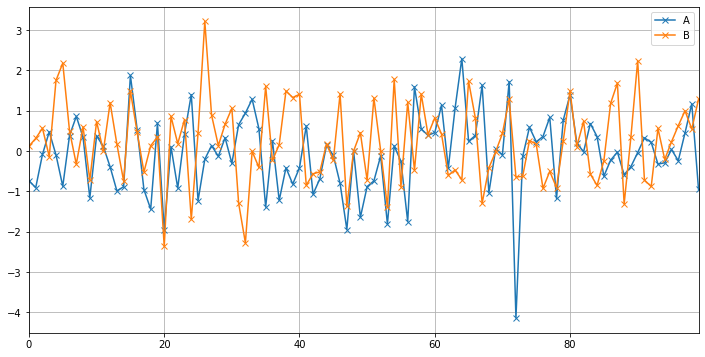

In [43]:
df2.plot(figsize=(12,6),grid=True,marker='x')